In [29]:
#Problem 1

import numpy as np
from numpy import array
from numpy import linalg
import scipy as scp
from scipy.linalg import svd

A = array([[-1.32, -0.18, 2.13], [2.64, -4.68, 4.65] , [1.47, -4.75,6.80] ])

print("A=", A)

U, s, VT = svd(A)
print("U=",U)
print()
print("s=",s)
print()
print("VT=", VT)
print()

print("The number of independent columns in A are:", np.linalg.matrix_rank(A))

A= [[-1.32 -0.18  2.13]
 [ 2.64 -4.68  4.65]
 [ 1.47 -4.75  6.8 ]]
U= [[ 0.1288709  -0.81535465 -0.56443697]
 [ 0.63455281  0.50520086 -0.58490583]
 [ 0.76205973 -0.28278772  0.58249127]]

s= [11.01365384  2.54146561  0.09990768]

VT= [[ 0.23837118 -0.60040816  0.76334083]
 [ 0.78470487 -0.34402767 -0.51563866]
 [ 0.57220403  0.72191066  0.38913692]]

The number of independent columns in A are: 3


A =  [[-1.   1. ]
 [ 2.5  1. ]
 [ 6.   1. ]
 [-3.5  1. ]
 [ 3.   1. ]
 [ 8.5  1. ]]

b =  [[  8.5]
 [  3. ]
 [ -5.5]
 [ 13. ]
 [  0. ]
 [-10. ]]
q =  [[-1.94140457]
 [ 6.51529513]]


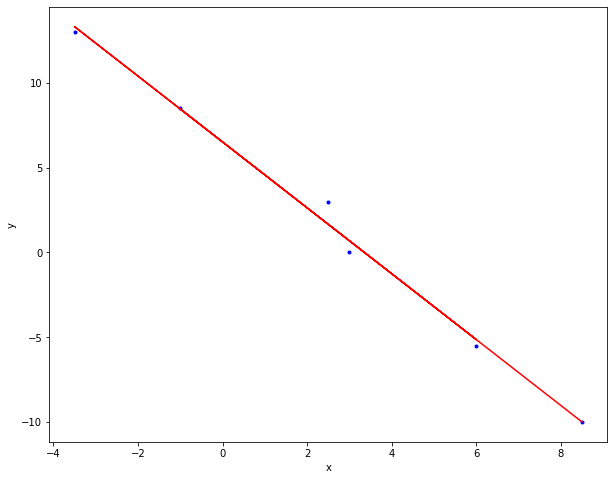

In [30]:
#Problem 2
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt


# X and Y coordinates from problem description
x = np.array([-1, 2.5, 6.0, -3.5, 3.0, 8.5])
y = np.array([8.5, 3.0, -5.5, 13.0, 0.0, -10.0])

A = np.vstack([x, np.ones(len(x))]).T

print("A = ", A)
print()

b = y.reshape((-1, 1))
print("b = ", b)

AtA = np.dot(A.T, A)
A_inv = np.linalg.inv(AtA)

q = np.dot((np.dot(A_inv,A.T)),b)
print("q = ", q)

plt.figure(figsize = (10,8))
plt.plot(x, y, 'b.')
plt.plot(x, q[0]*x + q[1], 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


In [31]:
# Load cguitar.tif from local machine into Colab instance
# Note: You only need to run this once
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

KeyboardInterrupt: ignored

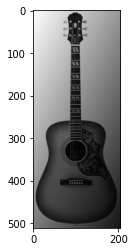

A =  [[  5. 200.   1.]
 [ 11.  20.   1.]
 [ 24.  91.   1.]
 [ 21.  10.   1.]
 [ 32.  32.   1.]
 [ 19. 100.   1.]
 [ 40.  67.   1.]]

B =  [[4.1480e+03 9.2180e+03 1.5200e+02]
 [9.2180e+03 6.4294e+04 5.2000e+02]
 [1.5200e+02 5.2000e+02 7.0000e+00]]

C =  [[ 1.47075509e-03  1.18817639e-04 -4.07628495e-02]
 [ 1.18817639e-04  4.85618187e-05 -6.18748955e-03]
 [-4.07628495e-02 -6.18748955e-03  1.48763538e+00]]
ecs =  [[0.59215686]
 [0.94509804]
 [0.07843137]
 [0.95294118]
 [0.89803922]
 [0.09411765]
 [0.81960784]]
q =  [[-0.00424308]
 [-0.00339505]
 [ 0.9701098 ]]
511
205


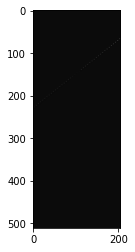

In [35]:
#Problem 6

import numpy as np
from PIL import Image
from numpy.linalg import inv
import matplotlib.pyplot as plt


  

img = np.asarray(Image.open('cguitar.tif'))


# Hint: Use the following lines to display an image
plt.imshow(img, cmap='gray')
plt.show()

# TODO: Compute least-squares estimate from selected corrupt pixels

x = np.array([5,11,24,21,32,19,40])
y = np.array([200,20,91,10,32,100,67])





#works with these
# x = np.array([-1, 2.5, 6.0, -3.5, 3.0, 8.5])
# y = np.array([8.5, 3.0, -5.5, 13.0, 0.0, -10.0])


A = np.vstack([x, y,np.ones(len(x))]).T

ecs = []


print("A = ", A)
print()


#B = A.T * A

B = np.dot(A.T, A)
print("B = ", B)

#C = B^(-1)

C = np.linalg.inv(B)
print()
print("C = ", C)



for i in range(len(x)):
    x_val = x[i]
    y_val = y[i]
    ecs.append((img[x_val][y_val])/255)


ecs = np.array(ecs)
ecs = ecs.reshape((-1, 1))

print("ecs = ", ecs)

estimate = np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)),ecs)
print("q = ", estimate)


from ctypes import sizeof
# TODO: Undo the image corruption

rows, cols = (len(img), len(img[1]))

#rows,cols = (3,3)

print(rows)
print(cols)


original_image =[]
a = estimate[0][0]
b = estimate[1][0]
c = estimate[2][0]





for i in range(rows):
    temp = []
    for j in range(cols):
        img_value = img[i][j]
        temp.append(img_value/(i*a + b*j + c))
    original_image.append(temp)


# TODO: Display the uncorrupted image
plt.imshow(original_image, cmap='gray')
plt.show()